In [1]:
import os
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

import cubnm
import cubnm_paper

# set plots font and dpi
# Note: the font is not included in the repository
import matplotlib.font_manager
font_path = os.path.join(cubnm_paper.config.DATA_DIR, 'assets', 'Optima.ttc')
matplotlib.font_manager.fontManager.addfont(font_path)
font = matplotlib.font_manager.FontProperties(fname=font_path, size=12)
plt.rcParams.update({
    "font.family": font.get_name(),
    "figure.dpi": 600
})

Load optimizer:

In [2]:
cmaes = cubnm_paper.data.load_cmaes(
    sub="group-train706",
    ses="",
    het_mode="homo",
    seed=1,
    popsize=128,
    n_iter=120,
)

In [3]:
cmaes.opt.round(3)

index           84.000
G                1.540
w_p              0.006
J_N              0.408
cost            -0.125
+fc_corr         0.299
-fcd_ks         -0.140
+gof             0.159
-fic_penalty    -0.034
gen             27.000
Name: 3412, dtype: float64

# A. Grid full

/tmp/ipykernel_10462/3672392344.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
/tmp/ipykernel_10462/3672392344.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(ax.get_zticklabels(), fontsize=8)
/tmp/ipykernel_10462/3672392344.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


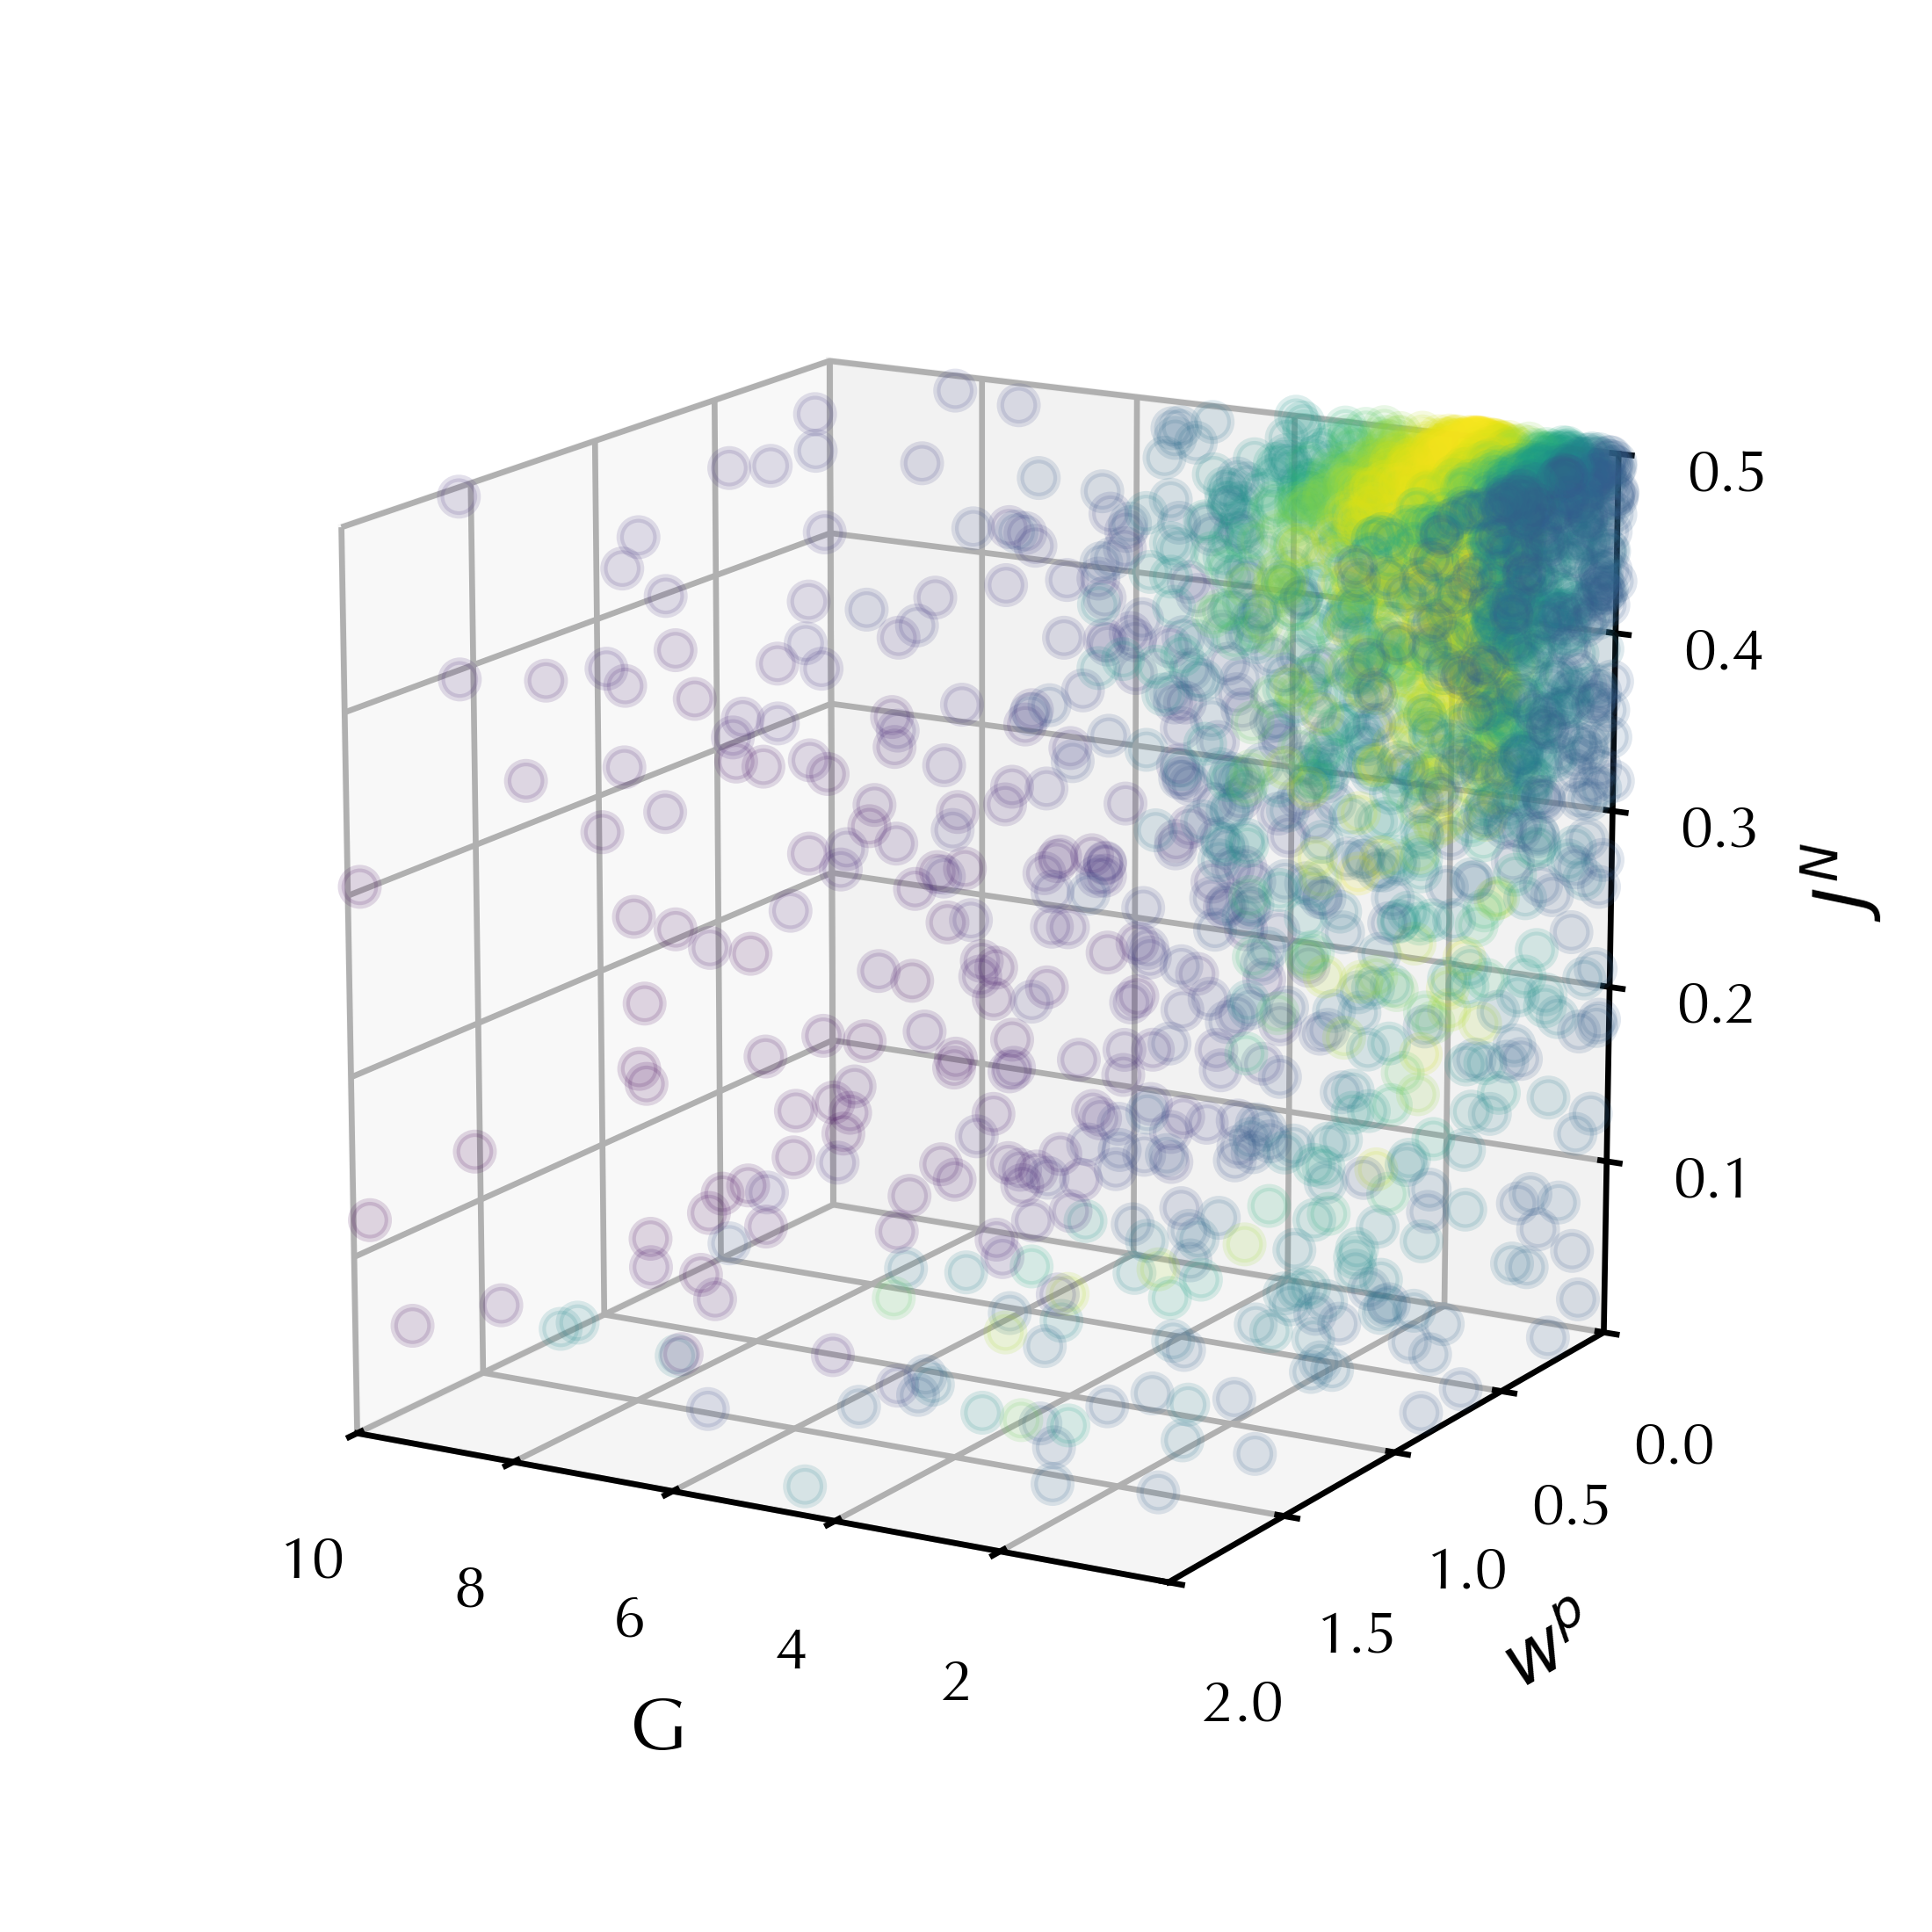

In [4]:
fig, ax = plt.subplots(figsize=(4.5,4.5), subplot_kw={'projection': '3d'})
cmaes.plot_space('-cost', opt=True, config=dict(size=25, alpha=0.15, azim=120), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
ax.set_yticks(ax.get_yticks()[::2]) # remove every other tick for w_p (to make the ticklabels less crowded)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
ax.set_zticklabels(ax.get_zticklabels(), fontsize=8)
ax.set_title('')
fig.tight_layout()
fig.savefig('cmaes_homo_cost_grid.png', transparent=True, bbox_inches='tight')

# B. Grid per generation

/tmp/ipykernel_10462/2563616210.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
/tmp/ipykernel_10462/2563616210.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(ax.get_zticklabels(), fontsize=8)
/tmp/ipykernel_10462/2563616210.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
/tmp/ipykernel_10462/2563616210.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(ax.get_zticklabels(), fontsize=8)
/tmp/ipykernel_10462/2563616210.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks

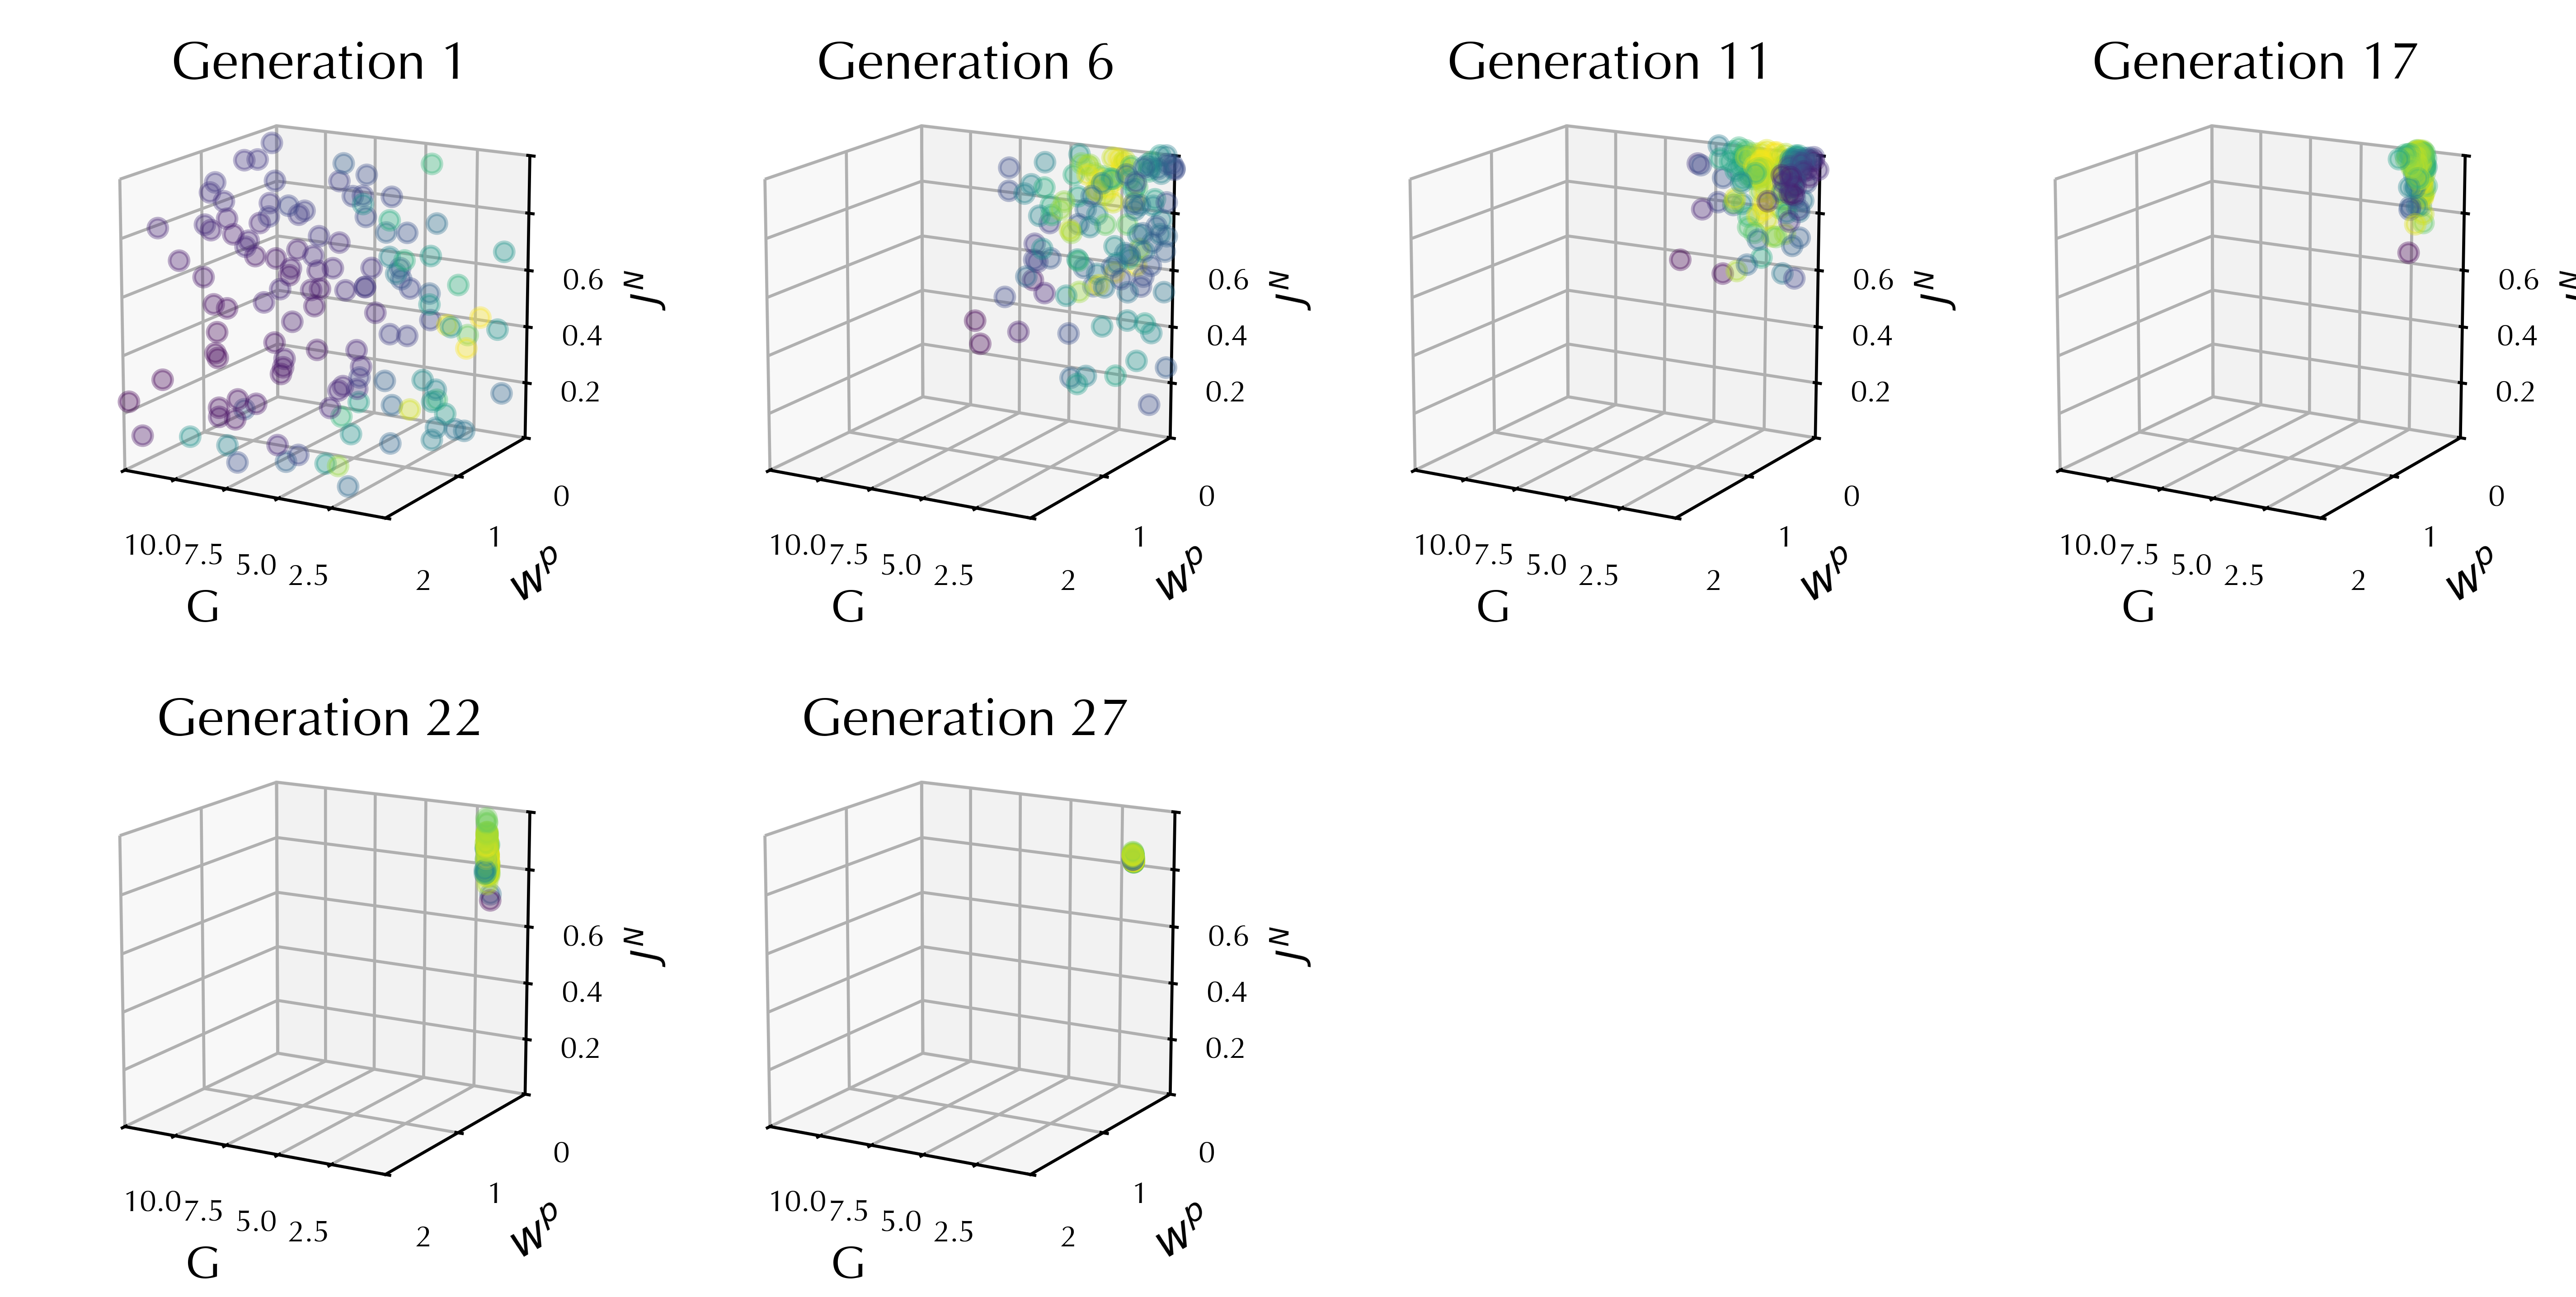

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6), subplot_kw={'projection': '3d'})
axes = axes.flatten()
for i, gen in enumerate(np.linspace(1, 27, 6).round().astype(int)):
    ax = axes[i]
    cmaes.plot_space('-cost', opt=True, config=dict(size=25, alpha=0.35, azim=120), gen=gen, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
    ax.set_yticks(ax.get_yticks()[::2]) # remove every other tick for w_p (to make the ticklabels less crowded)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
    ax.set_zticklabels(ax.get_zticklabels(), fontsize=8)
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)
    ax.set_title(f'Generation {gen}', y=0.95, fontsize=14)

# leave an empty space for panel C
for ax in [axes[6], axes[7]]:
    ax.axis('off')

fig.subplots_adjust(hspace=0.1, wspace=0.1)
fig.savefig('cmaes_homo_grid_hist.png', transparent=True)

# C. Cost history

/tmp/ipykernel_10462/677600601.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
/tmp/ipykernel_10462/677600601.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)


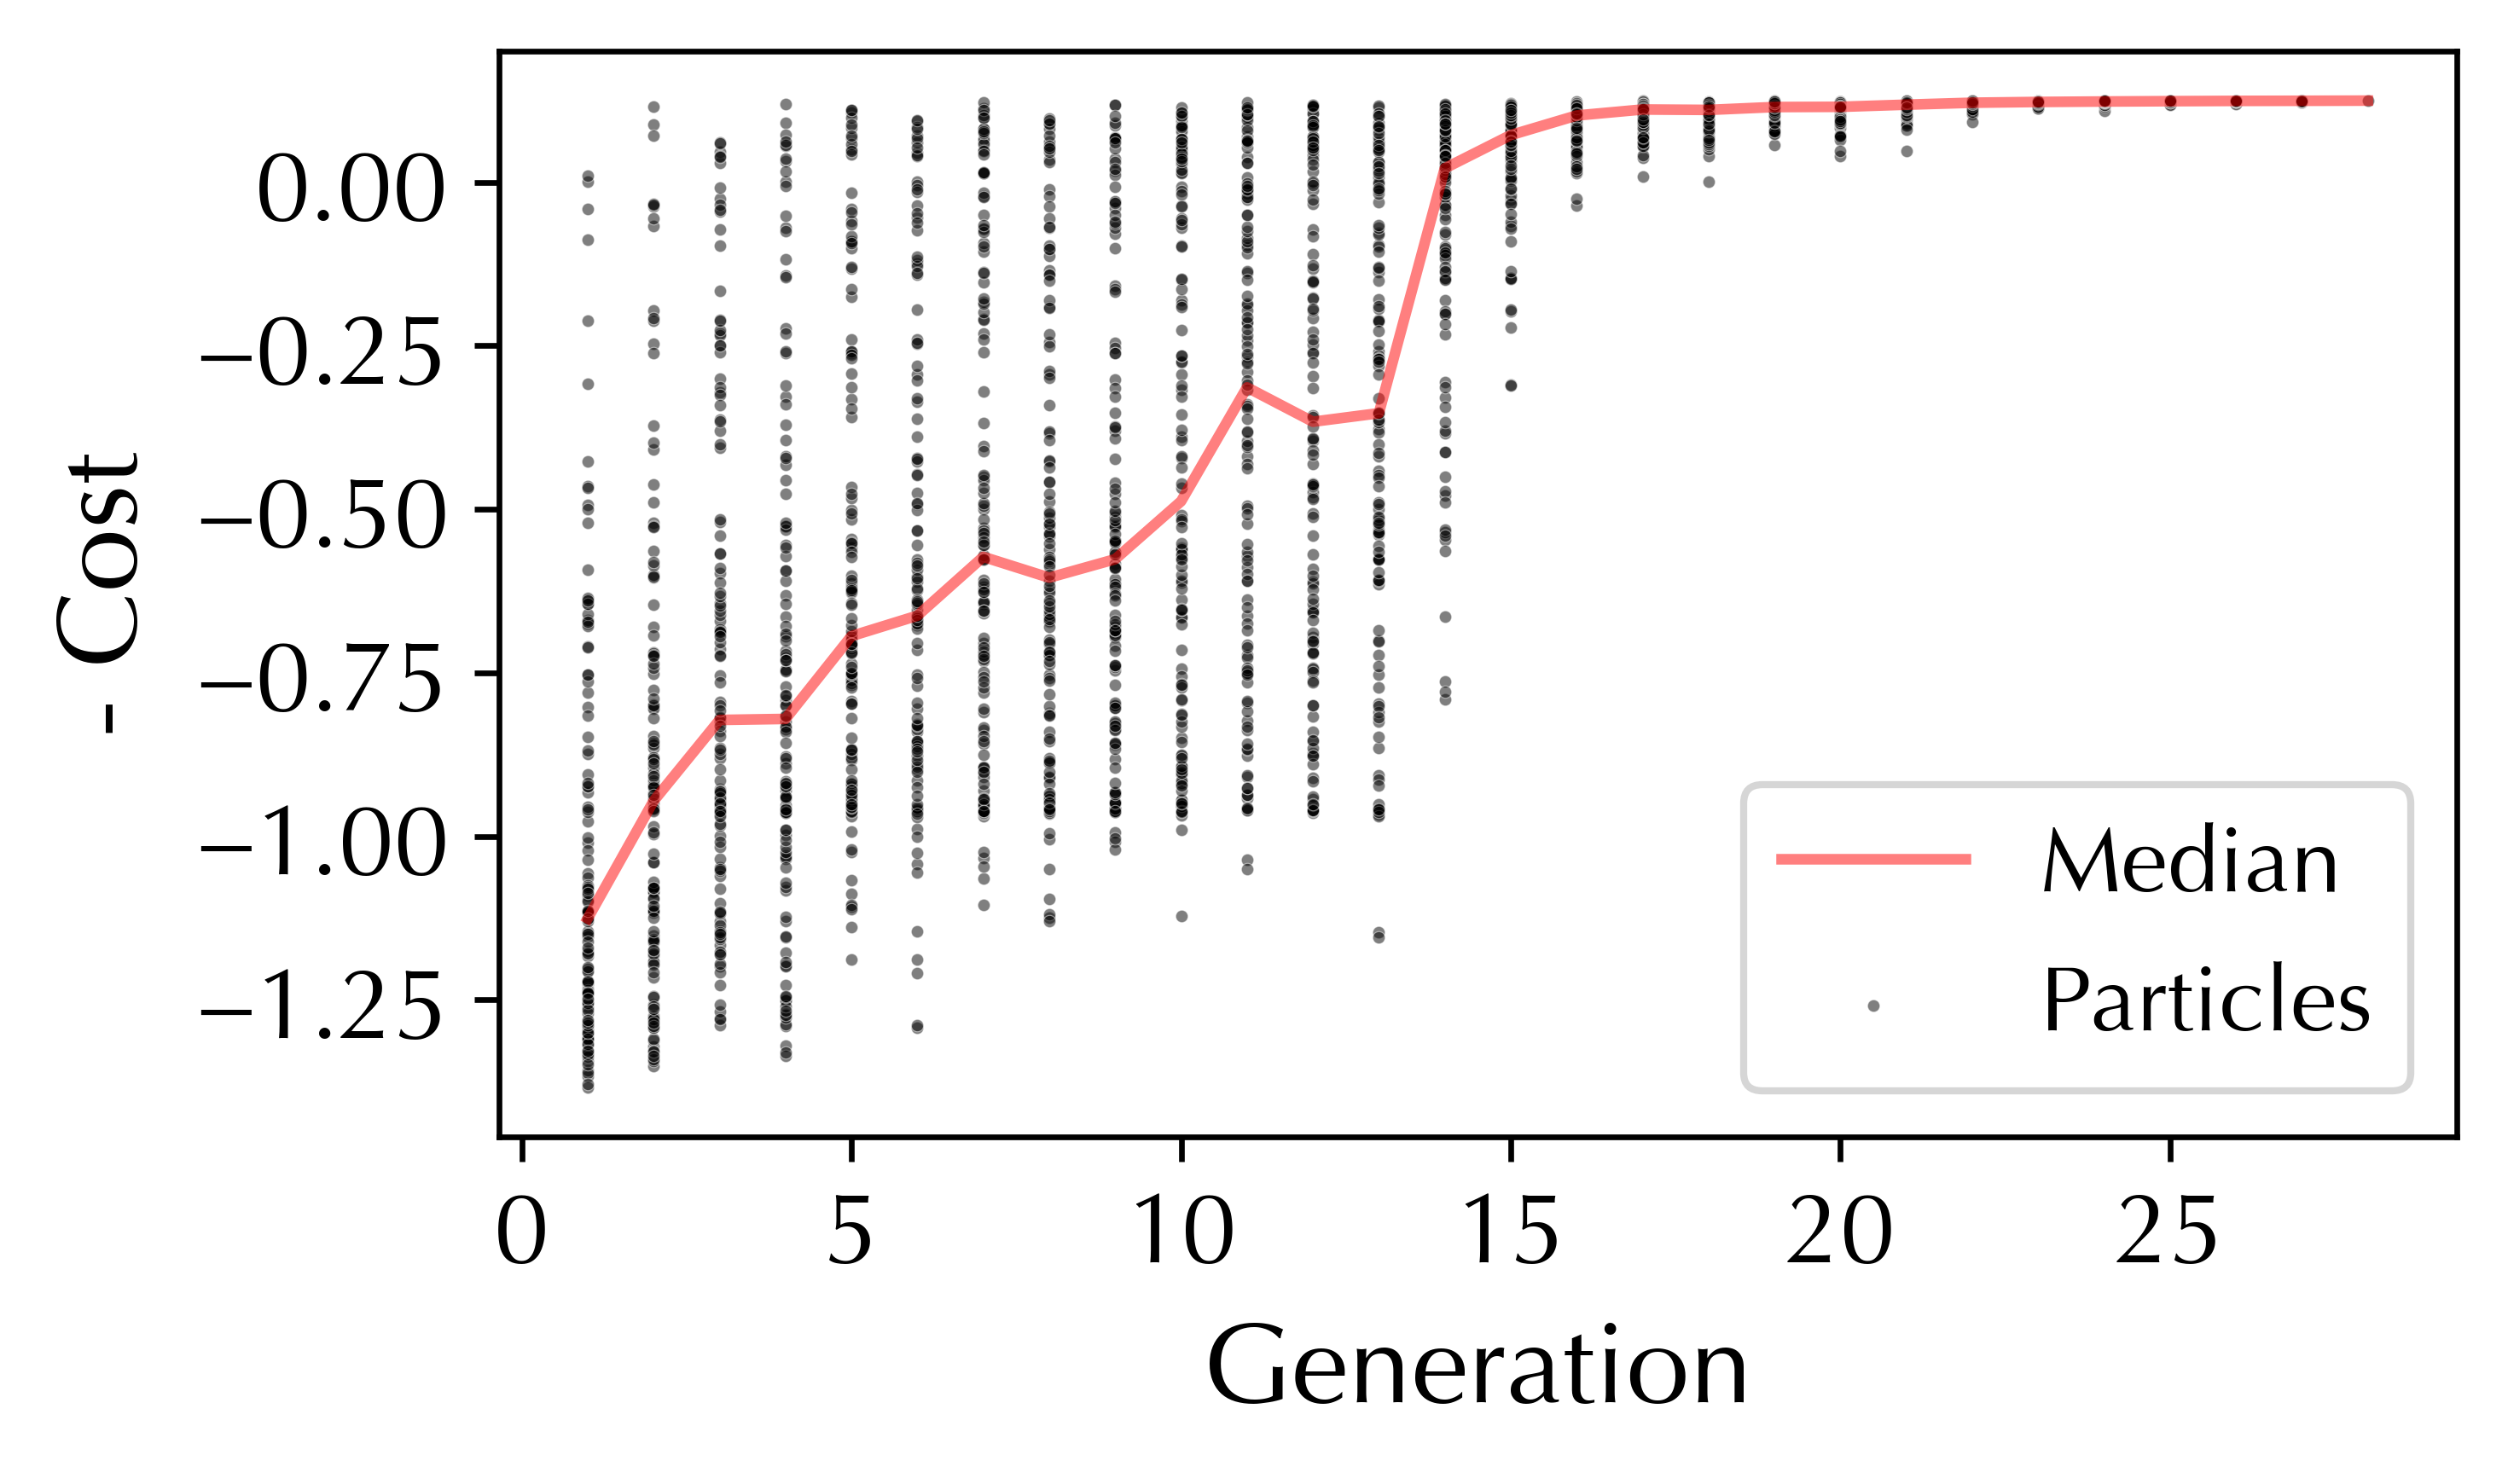

In [6]:
fig, ax = plt.subplots(figsize=(5, 3))
cmaes.plot_history(
    '-cost', 
    scatter_kws=dict(
        s=3,
    ),
    ax=ax
)
ax.set_xlabel(ax.get_xlabel(), fontsize=16)
ax.set_ylabel(ax.get_ylabel(), fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.legend(fontsize=13)
fig.tight_layout()
fig.savefig('cmaes_homo_hist.png', transparent=True, bbox_inches='tight')

In [7]:
cmaes.history

index         G       w_p       J_N      cost  +fc_corr   -fcd_ks  \
0         0  5.762320  1.308404  0.001974  0.932968 -0.001018 -0.931950   
1         1  4.339865  1.030360  0.127666  1.242046  0.162805 -0.929971   
2         2  3.187247  0.550022  0.194763  1.114425  0.250082 -0.919471   
3         3  5.701398  0.693853  0.305687  1.226502  0.196117 -0.927784   
4         4  0.752408  0.628908  0.049687  0.847909  0.083383 -0.931291   
...     ...       ...       ...       ...       ...       ...       ...   
3452    124  1.546899  0.003637  0.414021 -0.124486  0.299394 -0.140297   
3453    125  1.550253  0.000963  0.413591 -0.124893  0.299200 -0.139487   
3454    126  1.540987  0.000084  0.406421 -0.125062  0.298531 -0.139985   
3455    127  1.543821  0.003153  0.408601 -0.124201  0.298610 -0.140179   
3456      0  1.544129  0.003092  0.410349 -0.124936  0.298917 -0.139756   

          +gof  -fic_penalty  gen  
0    -0.932968      0.000000    1  
1    -0.767166     -0.474880    1  
2    -0.669389     -0.445036    1  
3    -0.731666     -0.494836    1  
4    -0.847909      0.000000    1  
...        ...           ...  ...  
3452  0.159096     -0.034611   27  
3453  0.159713     -0.034820   27  
3454  0.158546     -0.033484   27  
3455  0.158431     -0.034230   27  
3456  0.159162     -0.034225   28  

[3457 rows x 10 columns]

# Text. Test fit

Create a `rWWSimGroup` using test dataset's SC, apply optimal parameters (obtained from the train dataset), and assess its score against empirical FC and FCD of test dataset:

In [3]:
test_data = dict(
    sc = cubnm.datasets.load_sc('strength', sub='group-test303'),
    emp_fc_tril = cubnm.datasets.load_fc(sub='group-test303', exc_interhemispheric=True),
    emp_fcd_tril = cubnm.datasets.load_fcd(sub='group-test303', exc_interhemispheric=True)
)

sim_options = copy.deepcopy(cubnm_paper.config.HCP_SIM_OPTIONS)

test_sg = cubnm.sim.rWWSimGroup(
    sc = test_data['sc'],
    **sim_options
)

# set N and parameters
test_sg.N = 1
test_sg.param_lists['G'] = cmaes.opt_sim_data['G'].copy()
test_sg.param_lists['w_p'] = cmaes.opt_sim_data['w_p'].copy()
test_sg.param_lists['J_N'] = cmaes.opt_sim_data['J_N'].copy()
test_sg._set_default_params(missing=True) # default parameters (sigma)
# run and score simulation
test_sg.run()
score = test_sg.score(
    emp_fc_tril=test_data['emp_fc_tril'],
    emp_fcd_tril=test_data['emp_fcd_tril']
)
# add cost
score['cost'] = -(score['+gof'] + score['-fic_penalty'])
score.round(3)

Initializing CPU session...
Precalculating 60000000 noise elements...
noise will be repeated 30 times (nodes [rows] and timepoints [columns] will be shuffled in each repeat)
took 2.839353 s
Running 1 simulations...
nodes: 100
N_SIMS: 1
N_SCs: 1
BOLD_TR: 720
states_sampling: 720
time_steps: 900000
do_delay: 0
sim_seed: 0
exc_interhemispheric: 1
verbose: 1
progress_interval: 500
bold_remove_s: 30
drop_edges: 1
ext_out: 1
do_fc: 1
do_fcd: 1
states_ts: 0
noise_time_steps: 30000
Thread 0 (of 12) is executing particle 0 [08:38:15]
Simulations completed
Simulations and calculation of FC and FCD took 118.667938 s


+fc_corr  -fcd_ks   +gof  -fic_penalty   cost
0     0.298    -0.14  0.158        -0.034 -0.124